<a href="https://colab.research.google.com/github/profRCC/Softex/blob/master/Regress%C3%A3o_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regressão Linear**
* Dados relativos ao aluguél de bicicletas em Washington D.C entre os anos de 2011 e 2012
* [Bike Sharing](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)
* Atributos
  * instante
  * data
  * estação do ano (primavera, verão, outono e inverno)
  * ano
  * mês
  * hora
  * feriado (sim ou não)
  * dia da semana
  * dia útil (sim ou não)
  * clima (bom, nublado, chuvoso, ruim)
  * temperatura
  * sensação térmica
  * velocidade do vento
  * número de alugueis
* Objetivo é prever o número de alugueis no dia seguinte

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 1. Importar bibliotecas necessárias

In [ ]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

## 2. Lendo dados

In [ ]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Softex/Semana5/datasets/bike-rental/day.csv')
dados.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 3. Limpeza e organização dos dados

In [ ]:
dados = dados.drop(columns=['dteday','instant','casual','registered'])

## 4. Análise Preliminar dos Dados



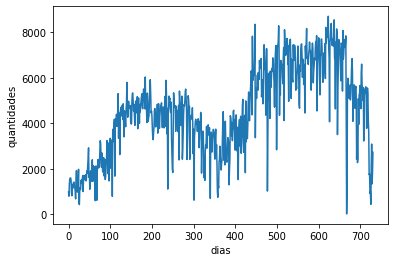

In [ ]:
#plotando alugueis por dia
plt.plot(dados.cnt)
plt.xlabel('dias')
plt.ylabel('quantidades')
plt.show()


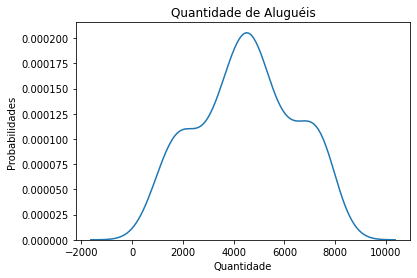

In [ ]:
# distribuição de probabilidade comparando job para as duas classes
sns.distplot(dados.cnt, hist=False, rug=False)
plt.xlabel('Quantidade')
plt.ylabel('Probabilidades')
plt.title('Quantidade de Aluguéis')

plt.show()

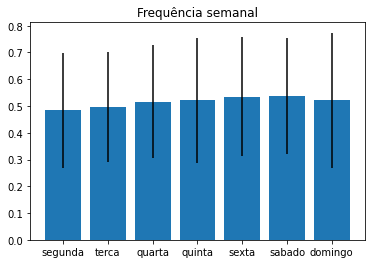

In [ ]:
indice = ['segunda','terca','quarta','quinta','sexta','sabado','domingo']
stats = dados.groupby(['weekday'],as_index=False)['cnt'].agg(['mean','std'])
plt.bar(indice,stats['mean'],yerr=stats['std'])
plt.title('Frequência média por dia da semana')
plt.show()

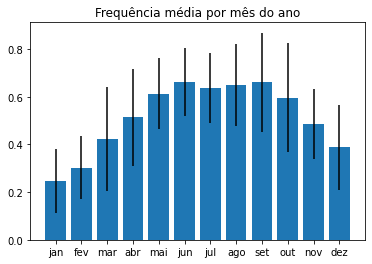

In [ ]:
indice = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
stats = dados.groupby(['mnth'],as_index=False)['cnt'].agg(['mean','std'])
plt.bar(indice,stats['mean'],yerr=stats['std'])
plt.title('Frequência média por mês do ano')
plt.show()

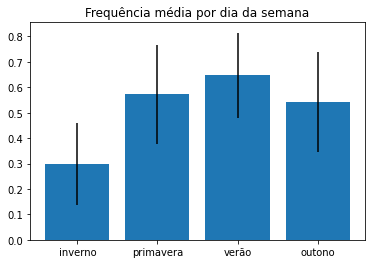

In [ ]:
indice = ['inverno','primavera','verão','outono']
stats = dados.groupby(['season'],as_index=False)['cnt'].agg(['mean','std'])
plt.bar(indice,stats['mean'],yerr=stats['std'])
plt.title('Frequência média por estação do ano')
plt.show()

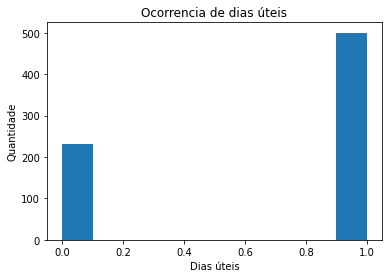

In [ ]:
#plotando ocorrência de dias uteis
plt.hist(dados.workingday)
plt.xlabel('Dias úteis')
plt.ylabel('Quantidade')
plt.title('Ocorrencia de dias úteis')
plt.show()

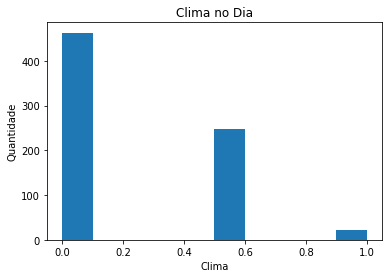

In [ ]:
#plotando ocorrência do clima no dia
plt.hist(dados.weathersit)
plt.xlabel('Clima')
plt.ylabel('Quantidade')
plt.title('Clima no Dia')
plt.show()

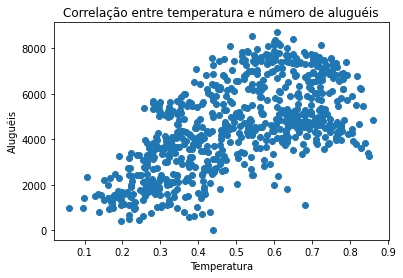

In [ ]:
# plotando correlação entre temperatura e número de aluguéis
plt.scatter(dados.temp,dados.cnt)
plt.xlabel('Temperatura')
plt.ylabel('Aluguéis')
plt.title('Correlação entre temperatura e número de aluguéis')
plt.show()

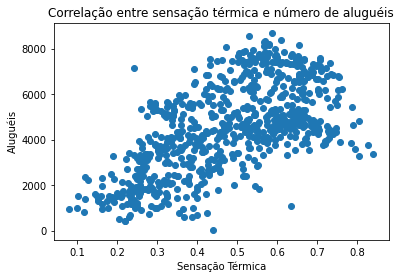

In [ ]:
# plotando correlação entre temperatura e número de aluguéis
plt.scatter(dados.atemp,dados.cnt)
plt.xlabel('Sensação Térmica')
plt.ylabel('Aluguéis')
plt.title('Correlação entre sensação térmica e número de aluguéis')
plt.show()

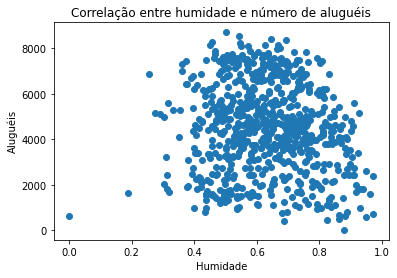

In [ ]:
# plotando correlação entre temperatura e número de aluguéis
plt.scatter(dados.hum,dados.cnt)
plt.xlabel('Humidade')
plt.ylabel('Aluguéis')
plt.title('Correlação entre humidade e número de aluguéis')
plt.show()

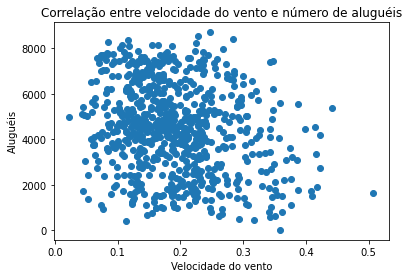

In [ ]:
# plotando correlação entre temperatura e número de aluguéis
plt.scatter(dados.windspeed,dados.cnt)
plt.xlabel('Velocidade do vento')
plt.ylabel('Aluguéis')
plt.title('Correlação entre velocidade do vento e número de aluguéis')
plt.show()

In [ ]:
#calculando correlação dos dados com o atributo contagem
corr = dados.corr()

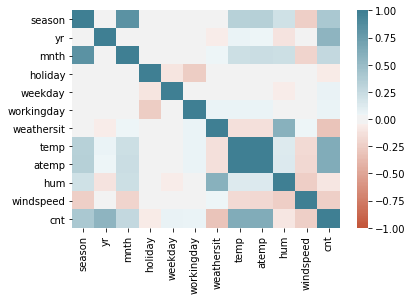

In [ ]:
#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

## 5. Re-escala dos dados

In [ ]:
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606,0.110792
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215,0.089623
2,0.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740,0.152669
3,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.607131,0.284297,0.177174
4,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143,0.181546


## 6. Organizando dados para modelagem

In [ ]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.drop(columns=['cnt'])
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215
2,0.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740
3,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.607131,0.284297
4,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143


In [ ]:
y = dados.cnt
y.head()

0    0.110792
1    0.089623
2    0.152669
3    0.177174
4    0.181546
Name: cnt, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#random_state=42

## 7. Treinando os modelos e fazendo previsão


In [ ]:
#definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(X_train,y_train)
pred_linear = linear.predict(X_test)

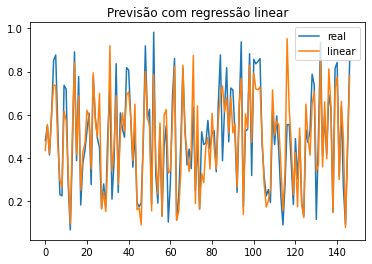

In [ ]:
#plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

In [ ]:
#definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(X_train,y_train)
pred_arvore = arvore.predict(X_test)

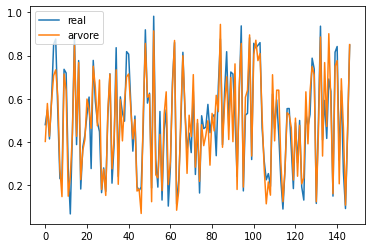

In [ ]:
#plotando resultados da árvore de decisão
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

In [ ]:
#definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=100)
floresta.fit(X_train,y_train)
pred_floresta = floresta.predict(X_test)

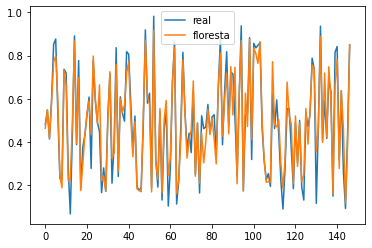

In [ ]:
#plotando resultados da random forest
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

In [ ]:
#define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic',max_iter=1000)
mlp.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)

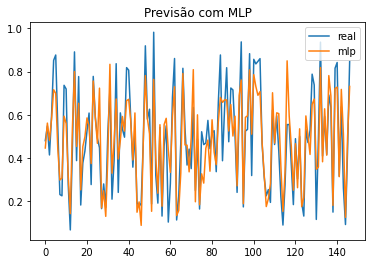

In [ ]:
#plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

## 8. Avaliando Modelos

### Mean Absolute Error (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
#Mae Árvore
mean_absolute_error(y_test,pred_linear)

0.07853851086777723

In [ ]:
#Mae Árvore
mean_absolute_error(y_test,pred_arvore)

0.06487433905913954

In [ ]:
#Mae Random Forest
mean_absolute_error(y_test,pred_floresta)

0.04940798818650898

In [ ]:
#Mae MLP
mean_absolute_error(y_test,pred_mlp)

0.08680785990132081

### Mean Squared Error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,pred_linear)

0.01066683741047151

In [ ]:
mean_squared_error(y_test,pred_arvore)

0.0073542467890187445

In [ ]:
mean_squared_error(y_test,pred_floresta)

0.004929674636501345

In [ ]:
mean_squared_error(y_test,pred_mlp)

0.011675959999841792

### Root Mean Squared Error (RMSE)

In [ ]:
mean_squared_error(y_test,pred_linear)**(1/2)

0.10328038250544733

In [ ]:
mean_squared_error(y_test,pred_arvore)**(1/2)

0.08575690519730027

In [ ]:
mean_squared_error(y_test,pred_floresta)**(1/2)

0.07021164174480857

In [ ]:
mean_squared_error(y_test,pred_mlp)**(1/2)

0.10805535618303144

### Mean Absolute Percentage Error (MAPE)

In [ ]:
def mean_absolute_percentage_error(y_test,y_pred):
  y_test=y_test.values
  erro = 0
  for i in range(len(y_test)):
    erro += abs(y_test[i]-y_pred[i])/y_test[i]
  return erro/len(y_test)

In [ ]:
mean_absolute_percentage_error(y_test,pred_linear)

0.2007020263948834

In [ ]:
mean_absolute_percentage_error(y_test,pred_arvore)

0.1825175582193379

In [ ]:
mean_absolute_percentage_error(y_test,pred_floresta)

0.15934619775112213

In [ ]:
mean_absolute_percentage_error(y_test,pred_mlp)

0.23646662511949912